# Import Modules

In [57]:
#Joseph Wanyoike Njoroge
#8th August 2023

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load Data

In [2]:
data = pd.read_csv("Datasets/advertising.csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Inspection

In [4]:
data.shape #Number of rows and columns

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data cleaning

In [7]:
#check null values
data.isnull().sum()*100/data.shape[0] #shows percentage of data in the columns that is null

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

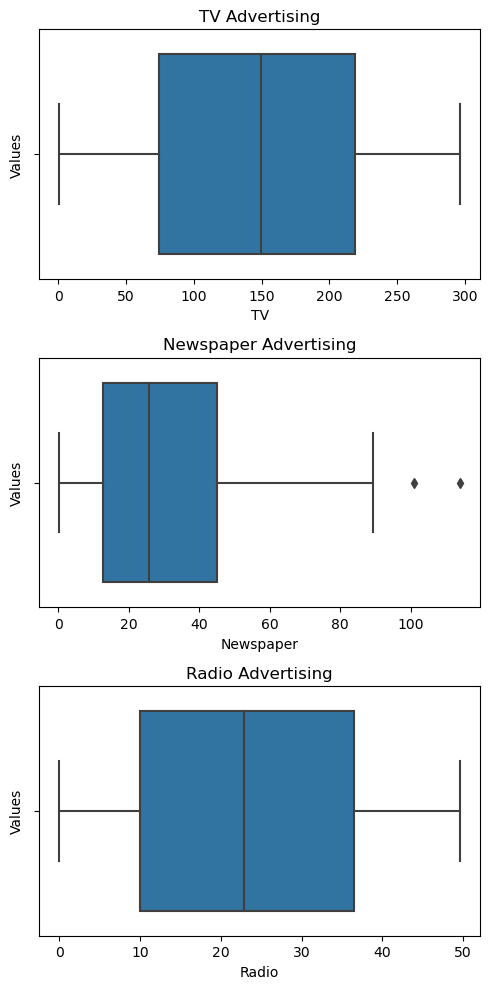

In [9]:
#check for outliers
fig, axs = plt.subplots(3, figsize=(5, 10))  # Adjust figsize as needed

plt1 = sns.boxplot(data=data, x='TV', ax=axs[0])
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Values')
axs[0].set_title('TV Advertising')

plt2 = sns.boxplot(data=data, x='Newspaper', ax=axs[1])
axs[1].set_xlabel('Newspaper')
axs[1].set_ylabel('Values')
axs[1].set_title('Newspaper Advertising')

plt3 = sns.boxplot(data=data, x='Radio', ax=axs[2])
axs[2].set_xlabel('Radio')
axs[2].set_ylabel('Values')
axs[2].set_title('Radio Advertising')

plt.tight_layout()
plt.show()


# Exploratory Data Analysis

C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


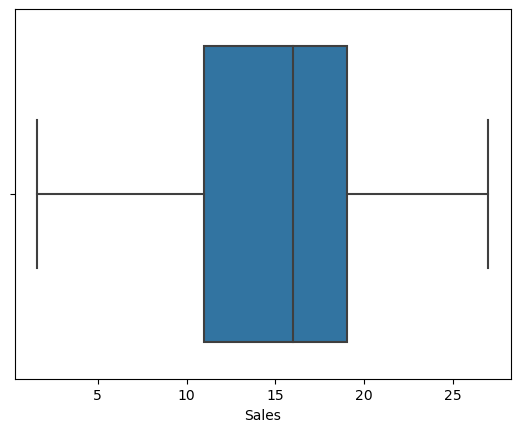

In [10]:
#Univariate Analysis
#Sales (Target Variable)

sns.boxplot(data["Sales"])
plt.show()

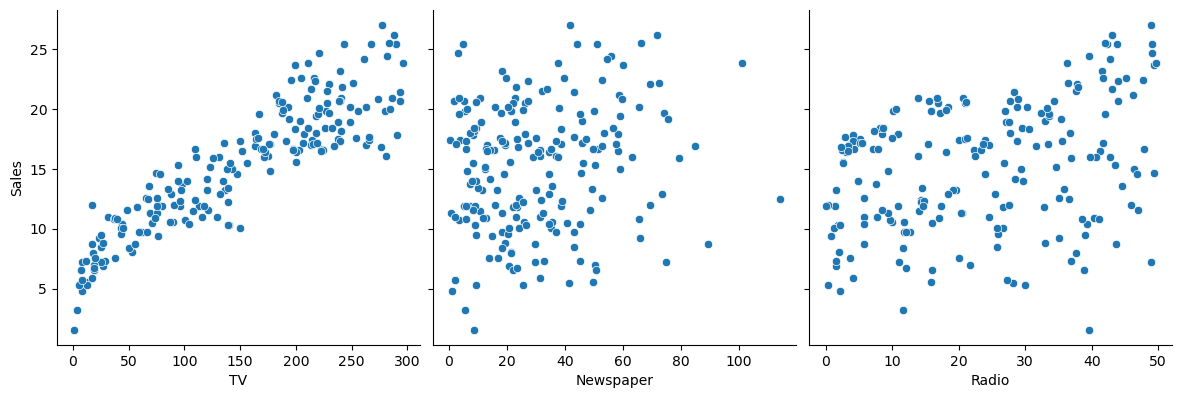

In [12]:
# Sales in relation to other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

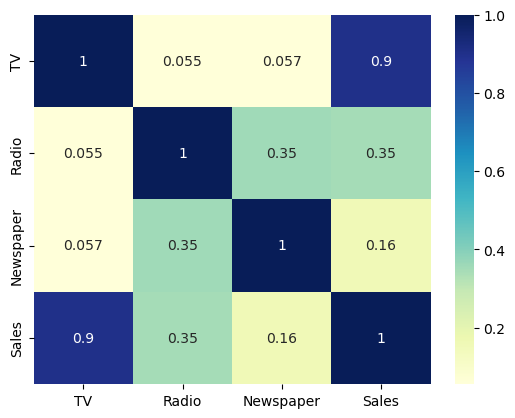

In [13]:
#correlation between different variables
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [16]:
#As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

# Train Model

In [20]:
model = LinearRegression()

In [26]:
X = data[["TV"]]
y =data[["Sales"]]

In [27]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state = 100 )

In [28]:
#Fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [39]:
y_train_predict = model.predict(X_train)
y_train_predict

array([[18.58874687],
       [15.21236477],
       [18.13056255],
       [14.74327129],
       [14.27417782],
       [11.32325258],
       [20.02875475],
       [11.76507318],
       [ 8.00687081],
       [19.26511421],
       [14.37781475],
       [ 8.3177816 ],
       [ 9.02142181],
       [16.35782558],
       [12.93780687],
       [20.04511848],
       [19.60875245],
       [10.55415747],
       [18.86147564],
       [19.73966226],
       [ 8.24687212],
       [10.64688525],
       [23.11604436],
       [14.65599809],
       [16.49964454],
       [18.97602172],
       [11.11597872],
       [20.79239529],
       [17.37237658],
       [22.63604174],
       [12.42507679],
       [19.38511486],
       [13.80508434],
       [11.02325094],
       [10.08506399],
       [21.27785249],
       [21.28876164],
       [19.89784494],
       [19.34147826],
       [17.84692463],
       [19.40147859],
       [22.80513357],
       [22.05240218],
       [17.84692463],
       [20.00148187],
       [10

In [40]:
#Residual analysis
#Distribution of the error terms
#We need to check if the error terms are also normally distributed 
#(which is infact, one of the major assumptions of linear regression), 
#let us plot the histogram of the error terms and see what it looks like.

residual = (y_train - y_train_predict)

C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


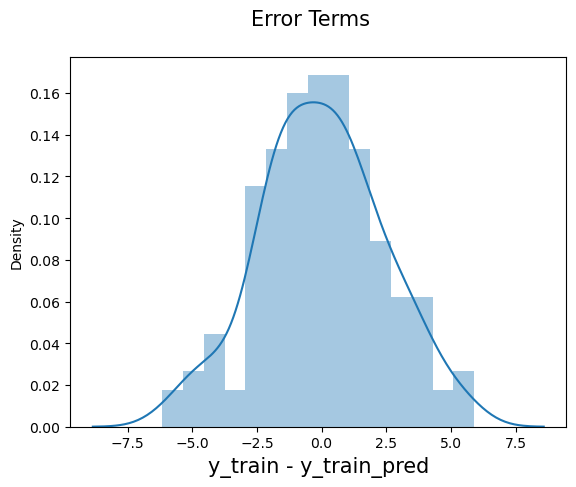

In [41]:
fig = plt.figure()
sns.distplot(residual, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [42]:
#The residuals are following the normally distributed with a mean 0. All good!


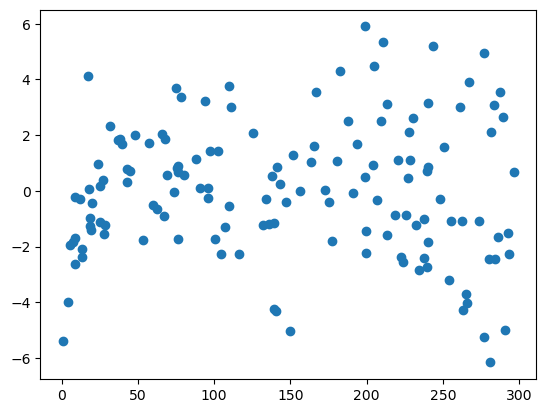

In [43]:
#Looking for patterns in the residuals

plt.scatter(X_train,residual)
plt.show()

In [45]:
#predict X_test
y_predict = model.predict(X_test)
y_predict

array([[ 7.37414007],
       [19.94148154],
       [14.32326899],
       [18.82329361],
       [20.13239168],
       [18.2287449 ],
       [14.54145201],
       [17.72692398],
       [18.75238413],
       [18.77420243],
       [13.34144544],
       [19.46693349],
       [10.01415451],
       [17.1923756 ],
       [11.70507285],
       [12.08689312],
       [15.11418241],
       [16.23237035],
       [15.8669138 ],
       [13.1068987 ],
       [18.65965635],
       [14.00690363],
       [17.60692332],
       [16.60328147],
       [17.03419291],
       [18.96511257],
       [18.93783969],
       [11.05597839],
       [17.03419291],
       [13.66326538],
       [10.6796127 ],
       [10.71234015],
       [13.5487193 ],
       [17.22510305],
       [ 9.67597085],
       [13.52144643],
       [12.25053038],
       [16.13418799],
       [19.07965865],
       [17.48692266],
       [18.69783838],
       [16.53237199],
       [15.92145955],
       [18.86693021],
       [13.5050827 ],
       [11

In [50]:
#Scatter plot of y_predict, x_test with a line

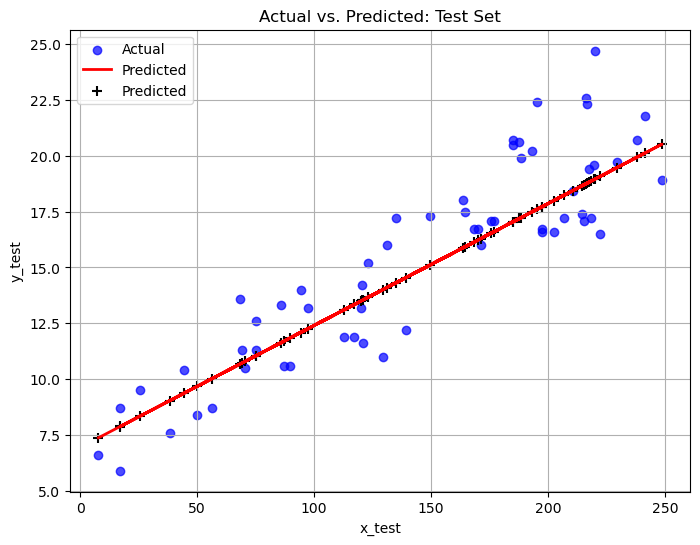

In [59]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Create a scatter plot of x_test vs. y_test
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.7)

# Plot the line representing y_pred
plt.plot(X_test, y_predict, color='red', label='Predicted', linewidth=2)

# Create a scatter plot of x_test vs. y_pred
plt.scatter(X_test, y_predict, color='black', label='Predicted', marker='+', s=50)

plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Actual vs. Predicted: Test Set')
plt.legend()  # Display legend for labels
plt.grid(True)
plt.show()

# Model Evaluation

In [64]:
r2 = r2_score(y_test, y_predict)
r2

0.792103160124566

In [65]:
mse = mean_squared_error(y_test, y_predict)
mse

4.07755637182695